# Кластеризация qRS комплексов в ЭКГ

## Общий вид цикла

<img src="./SinusRhythmLabels.png">

## Экстрасистола тип 1

<img src="./vebs.jpg">

## Экстрасистола тип 2

<img src="./Ventricular-extrasystole-ECG.jpg">

# Задание

Используя алгоритмы кластеризации разделить qRS комплесы ЭКГ на группы, схожие по форме.
Данные представлены в файлах:
* ecg1_samples.csv
* ecg2_samples.csv

In [96]:
import numpy as np
import pandas as pd

In [97]:
import matplotlib.pyplot as plt

In [98]:
%matplotlib inline

In [99]:
import matplotlib.image as mpimg

In [100]:
X = np.loadtxt('./ecg2_samples.csv')

In [101]:
print(X)

[[-0.02211 -0.0147  -0.01266 ...  0.5106   0.49545  0.47199]
 [-0.11145 -0.1062  -0.10871 ... -0.0808  -0.08287 -0.08434]
 [ 0.12544  0.12735  0.13848 ...  0.54598  0.52075  0.50307]
 ...
 [-0.02078 -0.01972 -0.02556 ... -0.03822 -0.03501 -0.03674]
 [ 0.15453  0.14507  0.13675 ...  0.44602  0.44811  0.44325]
 [-0.10865 -0.10322 -0.10616 ... -0.08216 -0.07675 -0.08109]]


In [102]:
X.shape

(3037, 140)

In [103]:
colors = {
    0: 'green',
    1: 'red',
    2: 'blue',
    3: 'yellow'
}

len(colors)

4

In [104]:
from sklearn.cluster import MiniBatchKMeans

In [105]:
kmeans = MiniBatchKMeans(init='random', n_clusters=4, random_state=0).fit(X)

In [106]:
kmeans

MiniBatchKMeans(batch_size=100, compute_labels=True, init='random',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=4,
        n_init=3, random_state=0, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [131]:
labels = np.zeros(shape=(X.shape[0],3))

In [134]:
labels

array([[0., 0., 0.],
       [1., 0., 0.],
       [3., 0., 0.],
       ...,
       [2., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.]])

In [133]:
labels[:,0] = kmeans.predict(X)

In [108]:
X.shape[0]

3037

In [135]:
colors.get(labels[0,0])

'green'

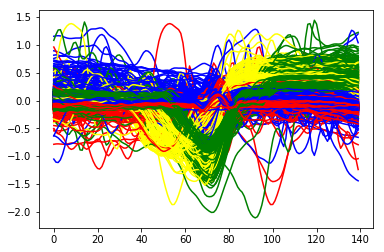

In [136]:
# for j in labels: Повторяется 3037 раз
for i in range(X.shape[0]):
    color = colors.get(labels[i,0])
    plt.plot(X[i], color=color)
plt.show()
    

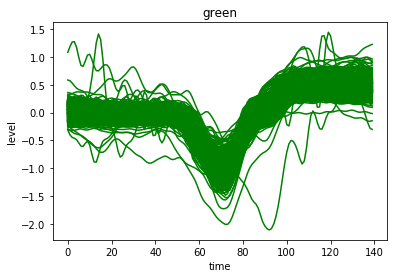

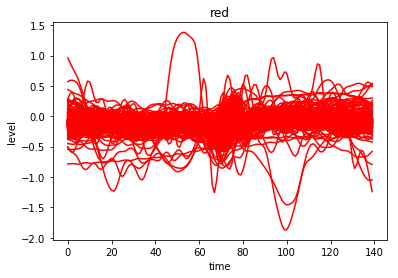

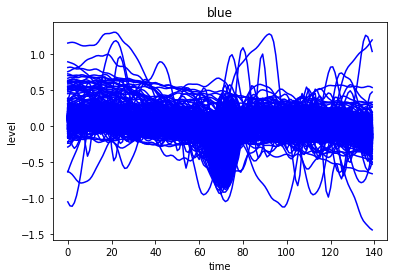

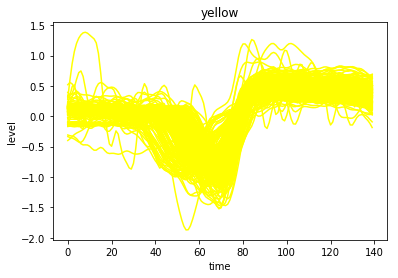

In [149]:
# for j in labels: Повторяется 3037 раз

for i in range(len(colors)):
    group_color = colors[i]
    for j in range(X.shape[0]):
            this_color = colors.get(labels[j,0])
            if (group_color == this_color):
                plt.plot(X[j], color=group_color)   

    plt.title(group_color)
    plt.xlabel('time')
    plt.ylabel('level')
    plt.show()

    

In [67]:
len(colors)

4

In [114]:
from sklearn.cluster import AgglomerativeClustering


Aggl = AgglomAggl erativeClustering(n_clusters=4)
# y_pred = DBSCAN().fit_predict(dataset)

In [115]:
Aggl 

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func=<function mean at 0x00000248FECA72F0>)

In [138]:
labels[:,1] = Aggl.fit_predict(X)

In [139]:
labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [3., 2., 0.],
       ...,
       [2., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [151]:
labels.shape

(3037, 3)

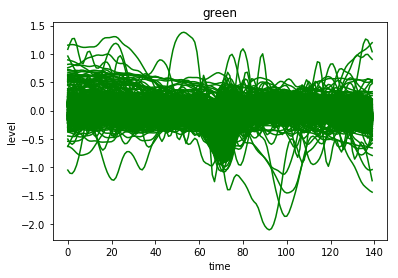

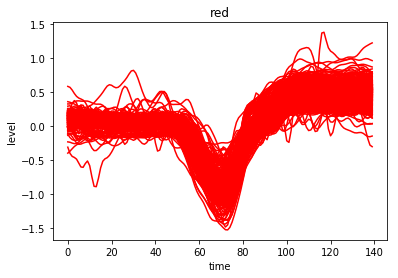

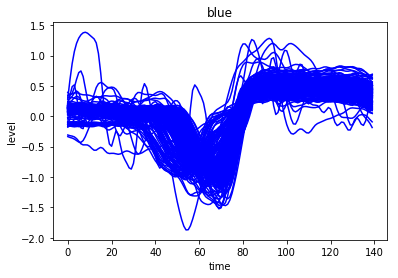

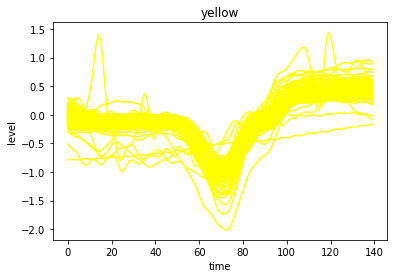

In [141]:
# for j in labels: Повторяется 3037 раз

for i in range(len(colors)):
    group_color = colors[i]
    for j in range(X.shape[0]):
            this_color = colors.get(labels[j,1])
            if (group_color == this_color):
                plt.plot(X[j], color=group_color)   

    plt.title(group_color)
    plt.xlabel('time')
    plt.ylabel('level')
    plt.show()

In [168]:
from sklearn.cluster import DBSCAN

labels[:,2] = DBSCAN().fit_predict(X)

In [182]:
labels

array([[ 0.,  1., -1.],
       [ 1.,  0.,  0.],
       [ 3.,  2., -1.],
       ...,
       [ 2.,  0.,  0.],
       [ 0.,  1.,  1.],
       [ 1.,  0.,  0.]])

In [190]:
sort = labels[:,2] 
sort = sorted(sort)

unic = set()
for x in sort:
    unic.add(x)
print(unic)

len(unic)
#13 кластеров

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, -1.0}


13

In [197]:
colors_DB = {
    0: 'green',
    1: 'red',
    2: 'blue',
    3: 'yellow',
    4: 'black',
    5: 'gold',
    6: 'olive',
    7: 'aqua',
    8: 'orchid',
    9: 'tan',
    10: 'silver',
    11: 'sienna',
    12: 'coral',
}

colors_DB

{0: 'green',
 1: 'red',
 2: 'blue',
 3: 'yellow',
 4: 'black',
 5: 'gold',
 6: 'olive',
 7: 'aqua',
 8: 'orchid',
 9: 'tan',
 10: 'silver',
 11: 'sienna',
 12: 'coral'}

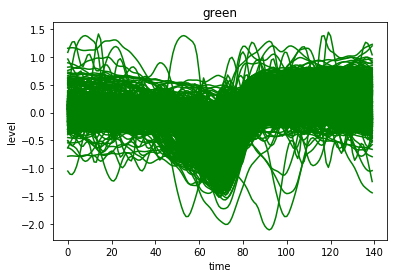

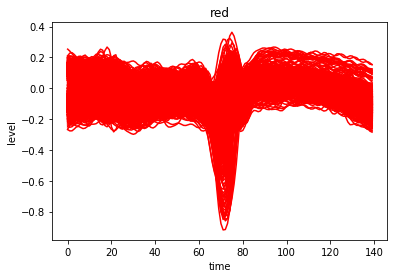

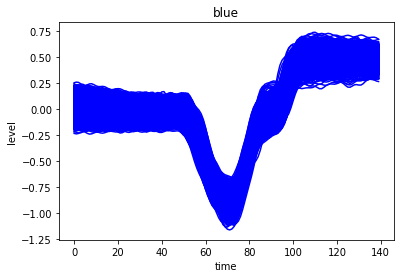

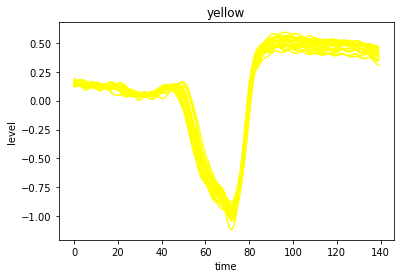

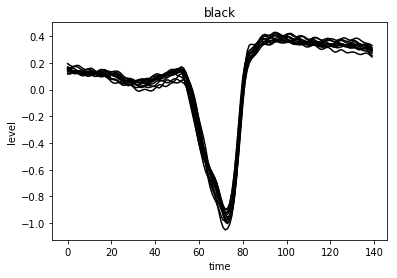

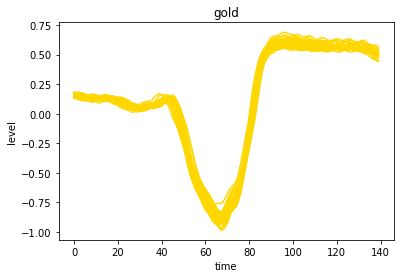

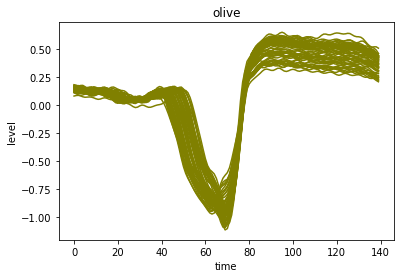

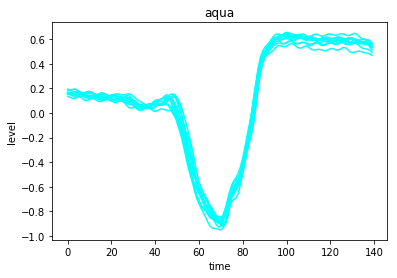

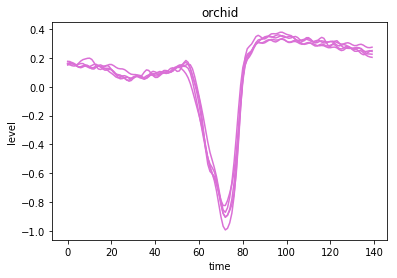

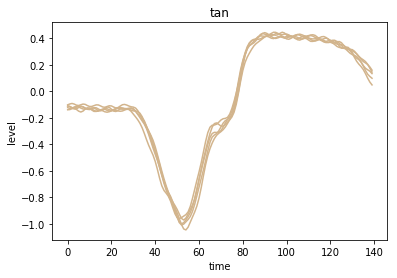

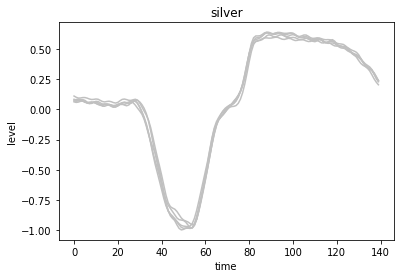

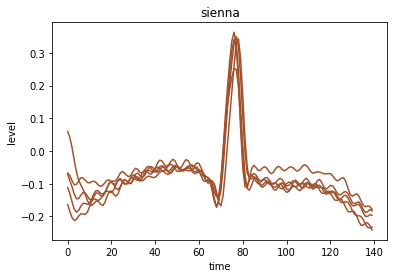

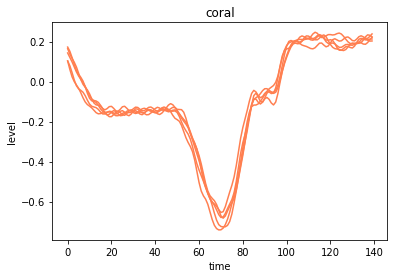

In [198]:
# for j in labels: Повторяется 3037 раз

for i in range(len(colors_DB)):
    group_color = colors_DB[i]
    for j in range(X.shape[0]):
            this_color = colors_DB.get(labels[j,2]+1)
            if (group_color == this_color):
                plt.plot(X[j], color=group_color)   

    plt.title(group_color)
    plt.xlabel('time')
    plt.ylabel('level')
    plt.show()

C:\Users\yaroslav\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


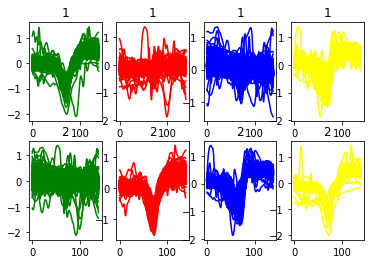

Алгоритм №1: kmeans
Алгоритм №2: AgglomerativeClustering
Алгоритм №3: DBSCAN


In [166]:
# for j in labels: Повторяется 3037 раз
# Импортируем один из пакетов Matplotlib
# !!! Две строки, три столбца, текущая ячейка
import pylab

# Импортируем пакет со вспомогательными функциями
from matplotlib import mlab

num_graf = 0

for algorithm in [0,1]:
    for i in range(len(colors)):
        num_graf = num_graf +1
        group_color = colors[i]
        for j in range(X.shape[0]):
            this_color = colors.get(labels[j,algorithm])
            if (group_color == this_color):
                 pylab.subplot (2, len(colors), num_graf) #  (len(colors), labels.shape[1]-1, i)
                 pylab.plot (X[j], color=group_color)
                 pylab.title (algorithm+1)

# Покажем окно с нарисованным графиком
pylab.show()

print('Алгоритм №1: kmeans')
print('Алгоритм №2: AgglomerativeClustering')
print('Алгоритм №3: DBSCAN')